## EDA: ¿Cómo afecta la intensidad de uso en Social Media a la salud mental de las personas?

#### Este proyecto de Análisis Exploratorio de Datos (EDA) tiene como objetivo explorar la relación entre la intensidad de uso de las redes sociales y la salud mental. Se analizarán datos para comprender cómo el tiempo dedicado a las redes sociales y ciertos comportamientos en línea pueden influir en la salud mental de las personas.

##### 1. Importar librerias y archivo donde tenemos la funciones y cargar el dataset

In [195]:
import numpy as np
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os
import plotly.graph_objects as go

# Agregar la carpeta src al path
sys.path.append(os.path.abspath(os.path.join('..')))

from src.functions import cargar_datos, estadisticas_basicas

 Dataset de Kaggle: https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health/data

In [196]:
#Ruta donde tengo el dataset
file_path = "../data/raw/smmh.csv"

#LLamada a la funión cargar_datos
df_1 = cargar_datos(file_path)

### Hipótesis

* ##### ¿Qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el riesgo de sufrir sintomatología depresiva?logía depresiva
* ##### ¿Qué relación hay entre la cantidad de horas empleadas en el uso de RRSS y el potencial uso nocivo de las mismas?s mismas
* ##### ¿Qué diferencias hay por género en el uso de RRSS y el riesgo de sufrir sintomatología depresiva?
* ##### ¿Qué diferencias hay por grupos de edad en el uso de RRSS y el riesgo de sufrir sintomatología depresiva?



##### He formulado mis hipótesis en base a diferentes agrupaciones de datos en mi dataset:
  * ##### La puntuación relacionada con uso nocivo de RRSS lo extraigo de las preguntas (9-17)
  * ##### El riesgo de sufrir sintomatología depresiva lo deduzco de las preguntas (18-20) del dataset que son preguntas sobre sintomatología.

In [4]:
pd.set_option("display.max_columns", None)

In [64]:
df_1.head(3)

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5


In [ ]:
## Llamamos a la función para cargar estadísticas básicas

estadisticas_basicas(df_1)

Estadísticas Descriptivas:
       1. What is your age?  \
count             481.00000   
mean               26.13659   
std                 9.91511   
min                13.00000   
25%                21.00000   
50%                22.00000   
75%                26.00000   
max                91.00000   

       9. How often do you find yourself using Social media without a specific purpose?  \
count                                         481.000000                                  
mean                                            3.553015                                  
std                                             1.096299                                  
min                                             1.000000                                  
25%                                             3.000000                                  
50%                                             4.000000                                  
75%                                             4.000000

#### Detectamos 30 Null Values en la columnaa: What type of organizations are you affiliated with?

#### Renombro las columnas a español y asigno etiquetas relacionadas con su significado


In [4]:
df_1_esp = df_1.rename(columns = {"1. What is your age?": "Edad",
                       "2. Gender": "Género",
                       "3. Relationship Status": "Estatus relacional",
                       "4. Occupation Status": "Ocupación",
                       "5. What type of organizations are you affiliated with?": "Afiliación",
                       "6. Do you use social media?" : "RS_uso" ,
                       "7. What social media platforms do you commonly use?": "RS_tipo",
                       "8. What is the average time you spend on social media every day?": "RS_tiempo_medio",
                       "9. How often do you find yourself using Social media without a specific purpose?": "TDAH_1",
                       "10. How often do you get distracted by Social media when you are busy doing something?": "TDAH_2",
                       "11. Do you feel restless if you haven't used Social media in a while?": "Ansiedad_1",
                       "12. On a scale of 1 to 5, how easily distracted are you?": "TDAH_3",
                       "13. On a scale of 1 to 5, how much are you bothered by worries?" :"Ansiedad_2",
                       "14. Do you find it difficult to concentrate on things?":"TDAH_4",
                       "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?":"Autoestima_1",
                       "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Autoestima_2",
                       "17. How often do you look to seek validation from features of social media?": "Autoestima_3",
                       "18. How often do you feel depressed or down?": "Depresion_1",
                       "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Depresion_2",
                       "20. On a scale of 1 to 5, how often do you face issues regarding sleep?" : "Depresion_3"})



                         

#### Establecemos una nueva variable para el df en español. En este caso hemos eliminado la columna de Timestamp (por no sernos de utilidad para el análisis) y la columna de Afiliación que tenía 30 null values y tampoco nos es de utilidad debido al tamaño de la muestra donde no nos va a aportar información relevante.

In [72]:

df_1_esp = df_1_esp.loc[:, ["Edad","Género" ,"Estatus relacional","Ocupación"  ,"RS_uso" ,"RS_tipo" ,"RS_tiempo_medio" ,"TDAH_1" ,"TDAH_2" ,"TDAH_3" , "TDAH_4", "Ansiedad_1" ,"Ansiedad_2","Autoestima_1" ,"Autoestima_2" ,"Autoestima_3","Depresion_1","Depresion_2","Depresion_3"]]

In [73]:
estadisticas_basicas(df_1_esp)

Estadísticas Descriptivas:
             Edad      TDAH_1      TDAH_2      TDAH_3      TDAH_4  Ansiedad_1  \
count  481.000000  481.000000  481.000000  481.000000  481.000000  481.000000   
mean    26.135135    3.553015    3.320166    3.349272    3.245322    2.588358   
std      9.915079    1.096299    1.328137    1.175552    1.347105    1.257059   
min     13.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     21.000000    3.000000    2.000000    3.000000    2.000000    2.000000   
50%     22.000000    4.000000    3.000000    3.000000    3.000000    2.000000   
75%     26.000000    4.000000    4.000000    4.000000    4.000000    3.000000   
max     91.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

       Ansiedad_2  Autoestima_1  Autoestima_2  Autoestima_3  Depresion_1  \
count  481.000000    481.000000    481.000000    481.000000   481.000000   
mean     3.559252      2.831601      2.775468      2.455301     3.255717   
std      1.2833

### Como hay varias categorias dentro de género quiero agrupar todas las que no son hombre o mujer en Other 

In [74]:

for i,  x in enumerate(df_1_esp["Género"]):
    if (x != "Female") and (x != "Male"):
        df_1_esp.loc[i,"Género"] = "Other"
        
    
df_1_esp["Género"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [77]:
print(f"Número de Hombres: {df_1_esp["Género"].value_counts().get("Male", 0)}")
print(f"Número de mujeres: {df_1_esp['Género'].value_counts().get('Female', 0)}")

print(f"Número de personas que se identifican de otra manera: {df_1_esp["Género"].value_counts().get("Other", 0)}")

Número de Hombres: 211
Número de mujeres: 263
Número de personas que se identifican de otra manera: 7


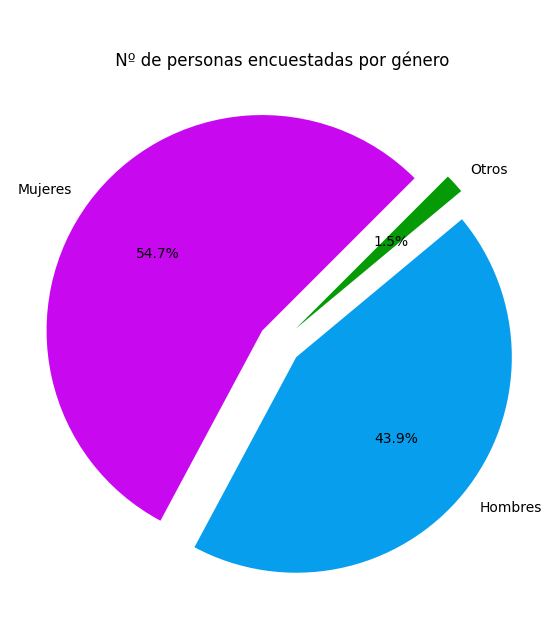

In [12]:
plt.figure(figsize=(8,7))
colors = ["#C808EE", "#089EEE", "#069B06"]
conteo_genero = df_1_esp["Género"].value_counts()
etiquetas = ["Mujeres", "Hombres", "Otros"]

plt.pie(conteo_genero, labels=etiquetas, colors=colors, autopct='%1.1f%%', startangle=45, explode=(0.1, 0.1, 0.1))

plt.title("\n\n Nº de personas encuestadas por género")

plt.show()

In [17]:

colors = ["#C808EE", "#089EEE", "#069B06"]
fig = go.Figure(data=[go.Pie(labels=etiquetas, values=conteo_genero, 
                             marker=dict(colors=colors),
                             textinfo='label+percent',
                             hole=0.3)])

fig.update_layout(title="Nº de personas encuestadas por género", title_x=0.5)
fig.update_layout(width=600, height=600)
fig.show()

In [78]:
df_1_esp[df_1_esp["Género"]== "Other"].head(7)

,Edad,Género,Estatus relacional,Ocupación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
35,21,Other,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord",More than 5 hours,3,4,4,5,5,4,1,3,1,4,2,1
67,18,Other,Single,School Student,Yes,"Twitter, Instagram, YouTube, Reddit, TikTok",Between 2 and 3 hours,2,1,3,3,2,5,2,3,2,4,2,4
85,24,Other,Single,Salaried Worker,Yes,"YouTube, Reddit",Between 2 and 3 hours,4,3,3,2,2,5,3,2,2,4,3,1
93,17,Other,Single,School Student,Yes,"Twitter, Instagram, YouTube, Snapchat, Discord...",Between 4 and 5 hours,4,4,4,4,3,2,3,2,2,3,3,5
238,69,Other,Divorced,Salaried Worker,Yes,TikTok,More than 5 hours,5,5,5,5,5,5,5,5,5,5,5,5
325,21,Other,Single,University Student,Yes,"Facebook, Instagram, YouTube, Snapchat, Reddit...",More than 5 hours,4,2,5,4,3,5,4,3,5,5,5,1
368,22,Other,In a relationship,Salaried Worker,Yes,"Facebook, Instagram, YouTube, Snapchat",More than 5 hours,4,5,5,3,5,1,3,4,2,1,2,1


In [79]:
## convertir la columna de edad en entero
df_1_esp['Edad'] = df_1_esp['Edad'].astype('int64')


#### Distribución de la muestra por edad y ocupación

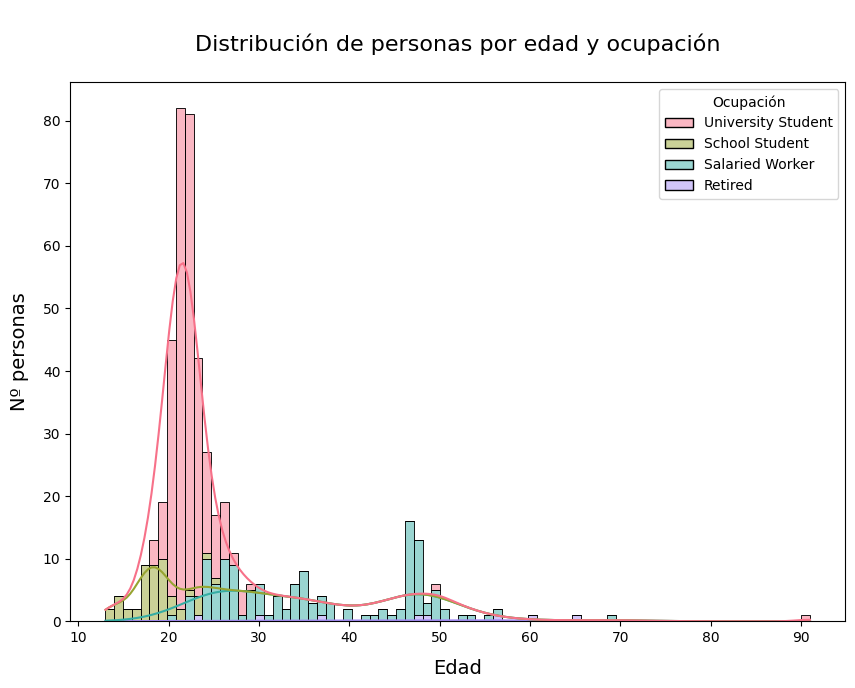

In [20]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df_1_esp, x="Edad", bins=80, hue="Ocupación", multiple="stack", palette="husl",kde=True)
plt.xlabel("Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº personas", fontsize=14,labelpad=(10.0))
plt.title("\nDistribución de personas por edad y ocupación\n", fontsize=16)
plt.show()

C:\Users\teres\AppData\Local\Temp\ipykernel_28636\1353142015.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




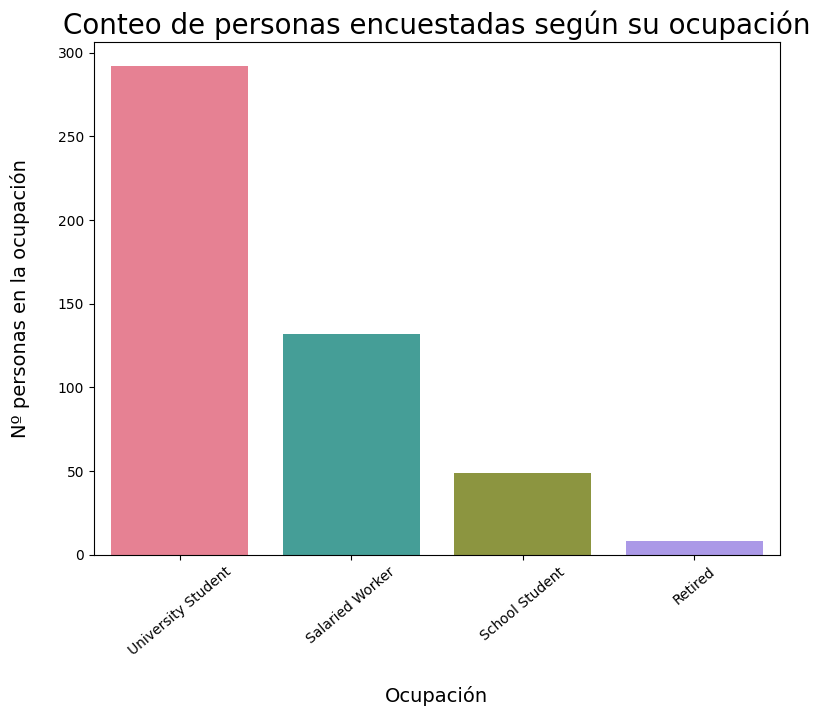

In [52]:
# Definir la paleta de colores
palette = sns.color_palette("husl", 4)

# Intercambiar los colores para "Salaried Worker" y "School Student"
idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")
palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

# 1. Crear el gráfico de barras con la paleta personalizada
plt.figure(figsize=(8, 7))

# Usar `df_1_esp["Ocupación"].value_counts()` para contar las ocurrencias de cada ocupación
ocupaciones = df_1_esp["Ocupación"].value_counts().index
conteo_ocupaciones = df_1_esp["Ocupación"].value_counts()

sns.barplot(x=ocupaciones, 
            y=conteo_ocupaciones,
            palette=palette)

plt.title("Conteo de personas encuestadas según su ocupación", fontsize=20, ha='center')
plt.ylabel("Nº personas en la ocupación", labelpad=20, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Ocupación", labelpad=20, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

En base a los datos obtenidos, no es posible establecer interpretaciones fiables sobre las diferencias por grupos de edad en el uso de redes sociales y el riesgo de enfermedades mentales, ya que la muestra está desbalanceada, con una sobrerrepresentación de jóvenes universitarios. Esto impide observar diferencias significativas entre los grupos de edad y limita la validez de las conclusiones en relación con toda la población.

In [80]:
df_1_esp["Estatus relacional"].unique()

array(['In a relationship', 'Single', 'Married', 'Divorced'], dtype=object)

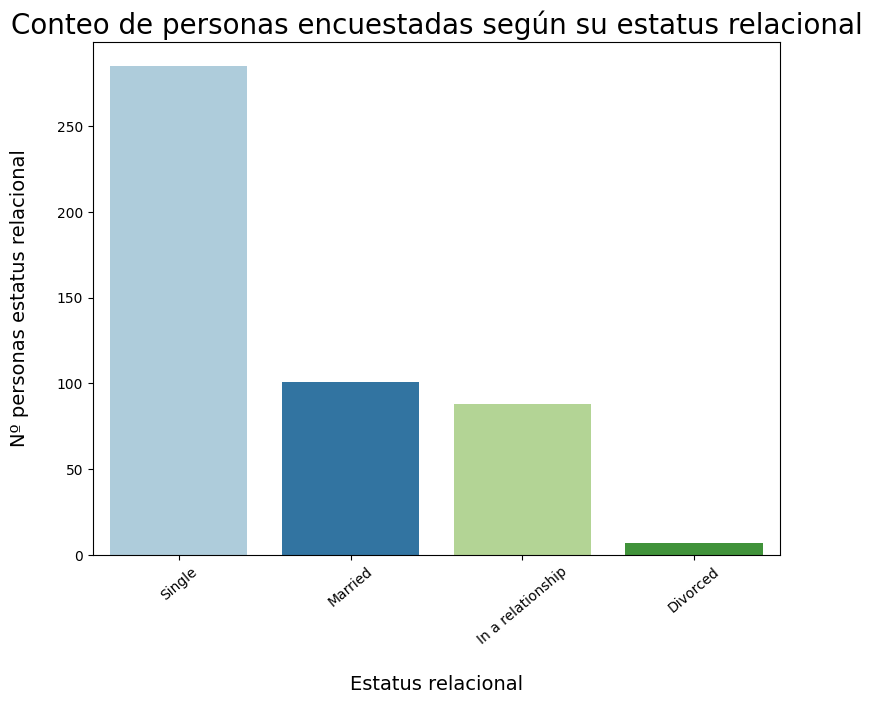

In [81]:
palette_relacional = sns.color_palette("Paired", 4)  # Aquí puedes usar otra paleta si lo deseas
plt.figure(figsize=(8, 7))
sns.barplot(x=df_1_esp["Estatus relacional"].value_counts().index, 
            y=df_1_esp["Estatus relacional"].value_counts(),
            hue = df_1_esp["Estatus relacional"].value_counts().index,
            palette=palette_relacional)
plt.title("Conteo de personas encuestadas según su estatus relacional", fontsize=20, ha='center')
plt.ylabel("Nº personas estatus relacional", labelpad=20, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Estatus relacional", labelpad=20, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

In [82]:
df_1_esp["Ocupación"].unique()

array(['University Student', 'School Student', 'Salaried Worker',
       'Retired'], dtype=object)

#### Ahora vamos a analizar las diferencias entre las personas que dicen que usan rrss y las que no:

In [83]:
usan_RS = df_1_esp[df_1_esp["RS_uso"]== "Yes"]
len(usan_RS)

478

In [84]:
no_usan_RS = df_1_esp[df_1_esp["RS_uso"]== "No"] 
len(no_usan_RS)

3

In [85]:
no_usan_RS

,Edad,Género,Estatus relacional,Ocupación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,20,Male,Single,University Student,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1,1,1,1
54,26,Male,In a relationship,Salaried Worker,No,"YouTube, Discord, Reddit",Between 1 and 2 hours,4,1,2,1,1,2,1,3,1,1,3,2
134,50,Male,Divorced,Salaried Worker,No,"Instagram, YouTube",Between 1 and 2 hours,2,1,2,2,1,2,1,4,1,2,2,1


 Vemos que estas personas pese a afirmar que no usar RRSS tienen un uso bajo, es un número de personas anecdótico, por lo que tampoco vamos a tenerlas muy en cuenta para nuestro análsis.

### Para comparar el tiempo en RS:

In [86]:
df_1_esp["RS_tiempo_medio"].unique()

array(['Between 2 and 3 hours', 'More than 5 hours',
       'Between 3 and 4 hours', 'Less than an Hour',
       'Between 1 and 2 hours', 'Between 4 and 5 hours'], dtype=object)

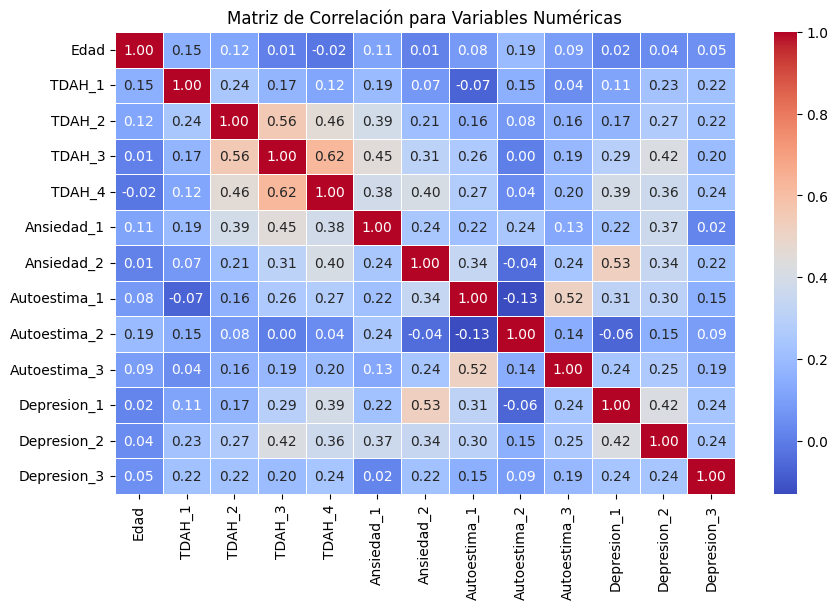

In [88]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') | 
             (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')].corr(numeric_only=True),
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5
)

plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()

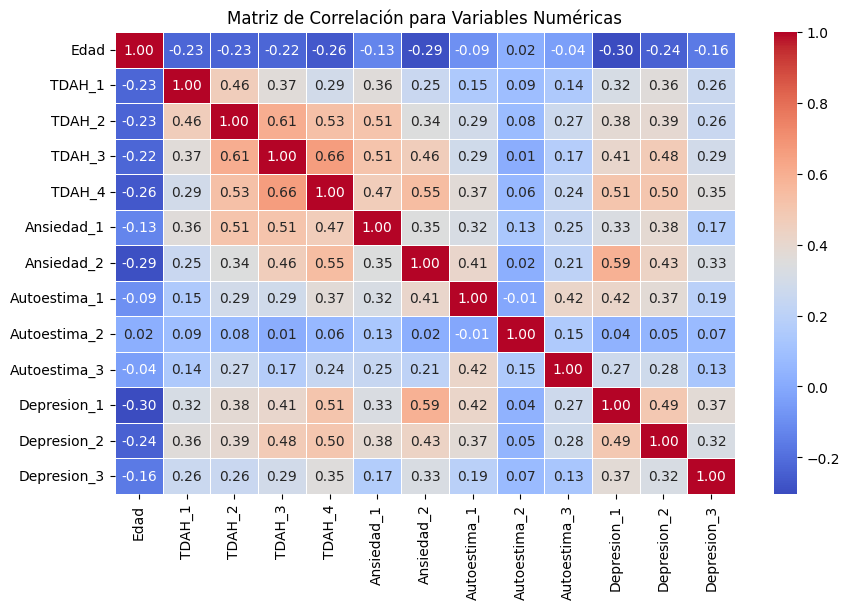

In [30]:
plt.figure(figsize=(10, 6))

sns.heatmap(
    df_1_esp.corr(numeric_only=True),
    annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5
)

plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()

In [197]:
df_1_esp["RS_tiempo_medio"].value_counts()


RS_tiempo_medio
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: count, dtype: int64

#### Agrupación de categorías de uso de redes sociales:

Para facilitar la interpretación y comparación, he decidido agrupar las categorías de horas de uso en tres bloques: Alto uso, Medio uso y Bajo uso. Esto se debe a que algunas categorías tienen muchas más respuestas que otras, lo que dificulta el análisis. Al agruparlas, conseguimos un mejor balance y una visualización más clara de cómo el uso de redes sociales se relaciona con riesgos de salud mental, como la depresión.

 Voy a establecer 3 datasets respecto a la cantidad de horas empleadas en redes sociales para un análisis preeliminar por grupos separados:

    * Grupo 1 : df_alto_uso : 4-5+
    * Grupo 2: df_medio_uso: 2-3
    * Grupo 3: df_bajo_uso: 0-2


In [260]:
df_alto_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 4 and 5 hours') |  (df_1_esp["RS_tiempo_medio"] =='More than 5 hours')]

En este análisis, he decidido separar las preguntas relacionadas con el uso nocivo de redes sociales(9-17) de las preguntas vinculadas a los síntomas relacionados con depresión(18-20):

* **Uso nocivo de redes sociales: Las preguntas de la 9 a la 17**  (como "¿Con qué frecuencia te distraes por redes sociales cuando estás ocupado?", "¿Te sientes inquieto si no usas redes sociales durante un tiempo?") se enfocan principalmente en el comportamiento de uso y las actitudes hacia las redes sociales. Aunque estas preguntas pueden estar asociadas a problemas de salud mental como ansiedad o dificultad para concentrarse, su propósito principal es evaluar cómo el uso y la relación con las redes sociales puede afectar el bienestar emocional, pero no necesariamente reflejan directamente síntomas de enfermedades mentales específicas como la depresión.

* **Síntomas de depresión: Por otro lado, las últimas tres preguntas** (relacionadas con depresión, como "¿Con qué frecuencia te sientes deprimido o decaído?", "¿Tu interés por las actividades diarias fluctúa con frecuencia?", "¿Tienes problemas para dormir?") se enfocan directamente en los síntomas de la depresión, evaluando de manera más explícita los efectos emocionales y psicológicos que pueden estar presentes.

Por lo tanto, la separación de estas dos áreas tiene como objetivo hacer un análisis más claro y efectivo, diferenciando entre los efectos emocionales de usar redes sociales y los síntomas específicos de la depresión

In [261]:
### la media de todo el grupo
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).mean()/9

3.384942319368549

In [262]:
## La media por usuario respecto a sus preguntas sobre el potencial uso nocivo que hacen de las RRSS y creamos una columna nueva
df_alto_uso["media_respuestas_uso"] = df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_28636\1866829391.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [263]:
## La media por usuario respecto a sus preguntas(columna19-21) y creamos una columna nueva que evalua la media de riesgo de sufrir problemas mentales relacionados con depresión
df_alto_uso["media_respuestas_riesgo"] = df_alto_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_28636\3412114349.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
df_alto_uso.head()

,Edad,Género,Estatus relacional,Ocupación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,...,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,Tipo_uso,Grupos_edad,Tiempo_uso_num,media_respuestas_uso,media_respuestas_riesgo
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,...,1,1,5,4,5,Alto,Jóvenes de 19-25,4+h,3.222222,4.666667
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,...,1,2,4,3,2,Alto,Jóvenes de 19-25,4+h,2.888889,3.000000
7,21,Female,In a relationship,University Student,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,...,3,1,5,5,1,Alto,Jóvenes de 19-25,4+h,2.444444,3.666667
8,21,Female,In a relationship,University Student,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,...,3,1,5,5,1,Alto,Jóvenes de 19-25,4+h,2.222222,3.666667
14,22,Male,Single,University Student,Yes,"Facebook, YouTube, Pinterest",More than 5 hours,5,5,5,...,5,5,5,5,5,Alto,Jóvenes de 19-25,4+h,5.000000,5.000000


#### Estadisticos de media moda mediana para ver si se encuentran cercanas:

In [265]:
df_alto_uso["media_respuestas_riesgo"].describe()

count    183.000000
mean       3.526412
std        0.935203
min        1.000000
25%        3.000000
50%        3.666667
75%        4.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [266]:
### la media de nuestro grupo de alto uso respecto al riesgo de sufrir problemas mentales relacionados con la depresión
df_alto_uso["media_respuestas_riesgo"].mean()

3.526411657559198

In [267]:
df_alto_uso["media_respuestas_riesgo"].mode()

0    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [268]:
df_alto_uso["media_respuestas_riesgo"].median()

3.6666666666666665

In [269]:
### la media de nuestro grupo de alto uso respecto al uso nocivo de RRSS
df_alto_uso["media_respuestas_uso"].mean()

3.384942319368548

In [270]:
df_alto_uso["media_respuestas_uso"].mode()

0    3.555556
Name: media_respuestas_uso, dtype: float64

In [271]:
df_alto_uso["media_respuestas_uso"].median()

3.4444444444444446

Aquí sólo quiero comprobar el rango máximo que sera esperable de 5 y el minimo de 1 y ver si hay alguna correlacion entre las preguntas en este grupo (es meramente informativo)

In [272]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).max()/9

5.0

In [273]:
df_alto_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).min()/9

1.2222222222222223

<Figure size 800x800 with 0 Axes>

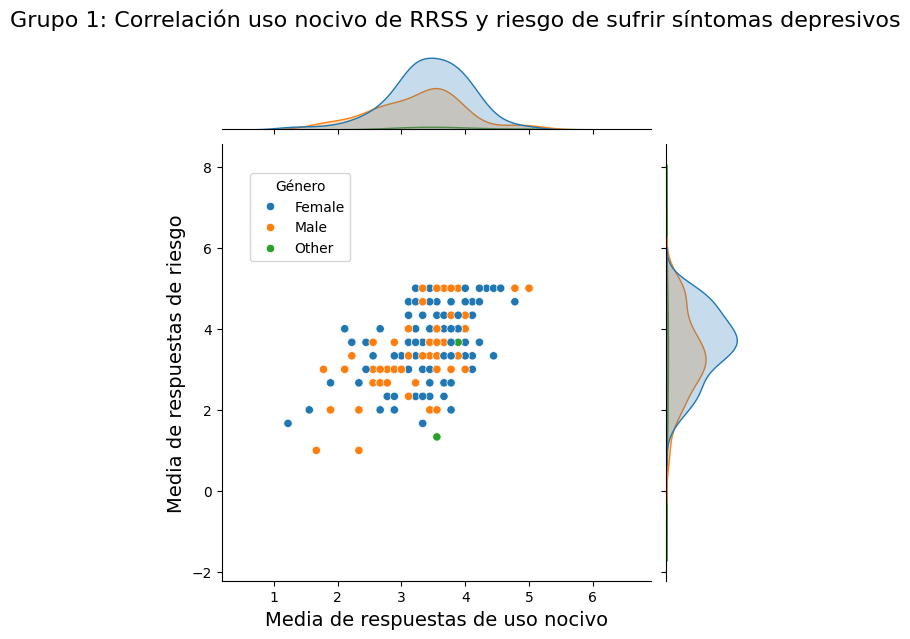

In [275]:
plt.figure(figsize=(8, 8))
joint_plot = sns.jointplot(data=df_alto_uso, x=df_alto_uso["media_respuestas_uso"], y=df_alto_uso["media_respuestas_riesgo"], hue="Género")
joint_plot.set_axis_labels("Media de respuestas de uso nocivo", "Media de respuestas de riesgo", fontsize=14)
joint_plot.fig.suptitle("Grupo 1: Correlación uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95));
plt.show()

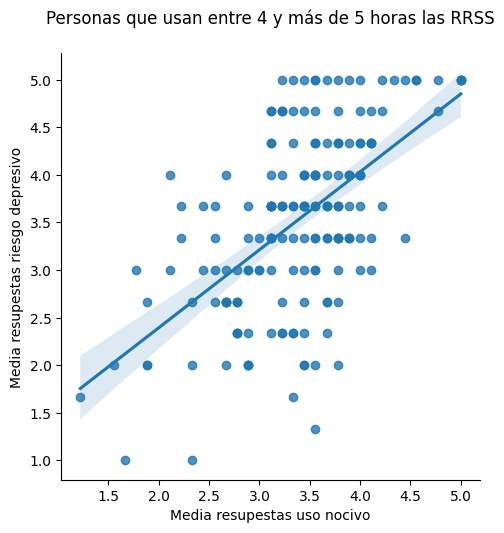

In [45]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo" ,fit_reg = True )
plt.title("Personas que usan entre 4 y más de 5 horas las RRSS\n")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");


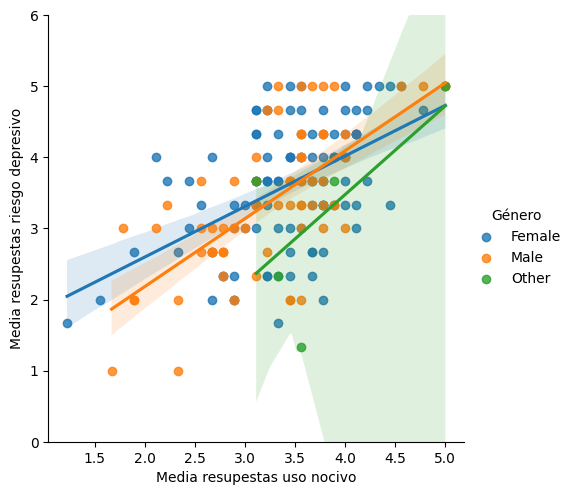

In [46]:
sns.lmplot( data = df_alto_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True,hue= "Género" )
plt.ylim(0,6)
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");


#### 2º grupo el uso medio de RRSS

In [47]:
df_uso_medio = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Between 2 and 3 hours') |  (df_1_esp["RS_tiempo_medio"] =='Between 3 and 4 hours')]

In [48]:
df_uso_medio.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,...,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
0,2022-04-18 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,5,5,2,2,2,3,2,5,4,5
2,2022-04-18 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,2,4,1,5,3,3,1,4,2,5
4,2022-04-18 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,5,4,5,3,3,3,4,4,1
5,2022-04-18 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,...,3,3,2,4,4,4,3,3,2,4
6,2022-04-18 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,...,2,3,2,4,5,3,4,5,5,3


In [49]:
df_uso_medio["media_respuestas_uso"] = df_uso_medio[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_20048\142126969.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df_uso_medio["media_respuestas_riesgo"] = df_uso_medio[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_20048\1193776907.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Miramos los estadísticos como con el grupo anterior

In [51]:
df_uso_medio["media_respuestas_riesgo"].describe()

count    194.000000
mean       3.221649
std        0.983813
min        1.000000
25%        2.666667
50%        3.333333
75%        4.000000
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [52]:
df_uso_medio["media_respuestas_riesgo"].mode()

0    3.000000
1    3.666667
Name: media_respuestas_riesgo, dtype: float64

In [53]:
df_uso_medio["media_respuestas_uso"].describe()

count    194.000000
mean       3.119129
std        0.700403
min        1.000000
25%        2.666667
50%        3.222222
75%        3.666667
max        5.000000
Name: media_respuestas_uso, dtype: float64

In [54]:
df_uso_medio["media_respuestas_uso"].mode()

0    2.777778
1    3.222222
Name: media_respuestas_uso, dtype: float64

<Figure size 800x800 with 0 Axes>

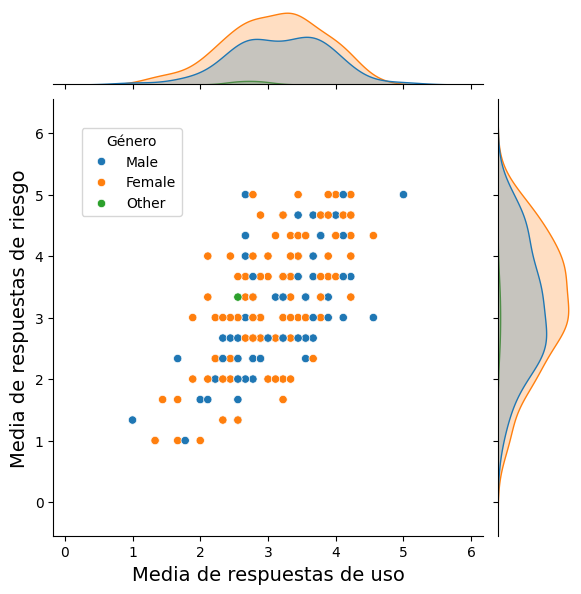

In [55]:
plt.figure(figsize=(8, 8))
joint_plot_1 = sns.jointplot(data=df_uso_medio, x=df_uso_medio["media_respuestas_uso"], y=df_uso_medio["media_respuestas_riesgo"], hue="Género")
joint_plot_1.set_axis_labels("Media de respuestas de uso", "Media de respuestas de riesgo", fontsize=14)
#joint_plot_1.fig.suptitle("Grupo 2: Correlación entre uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot_1.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95))

plt.show();

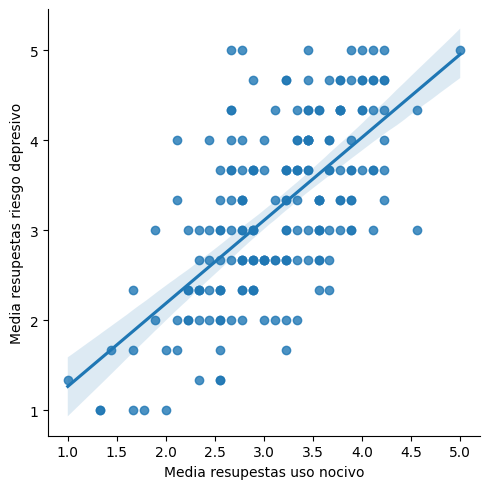

In [56]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

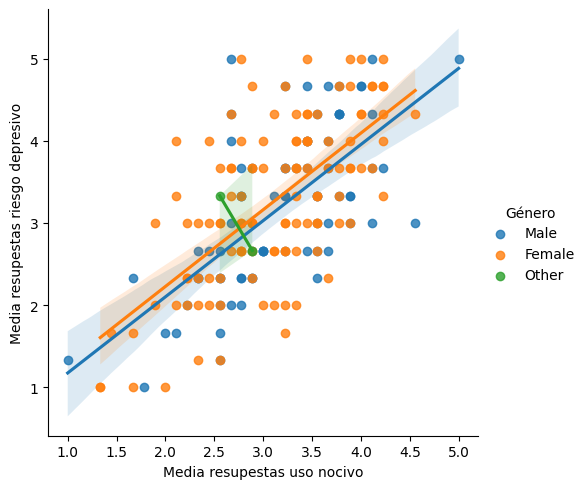

In [57]:
sns.lmplot( data = df_uso_medio, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True ,hue = "Género")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");




#### 3er Grupo de bajo uso de RRSS

In [58]:
df_bajo_uso = df_1_esp[(df_1_esp["RS_tiempo_medio"] =='Less than an Hour') |  (df_1_esp["RS_tiempo_medio"] =='Between 1 and 2 hours')]

In [59]:
df_bajo_uso.head()

,Timestamp,Edad,Género,Estatus relacional,Ocupación,Afiliación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,...,TDAH_3,TDAH_4,Ansiedad_1,Ansiedad_2,Autoestima_1,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3
9,2022-04-18 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,...,1,1,1,1,1,1,1,1,1,1
15,2022-04-18 20:15:31,23,Male,In a relationship,University Student,Private,Yes,"Facebook, Instagram, YouTube, Reddit",Between 1 and 2 hours,3,...,3,4,2,4,3,2,2,3,4,2
16,2022-04-18 20:15:38,21,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord",Less than an Hour,2,...,2,2,1,4,1,3,1,4,1,3
18,2022-04-18 20:22:02,28,Male,Single,University Student,University,Yes,"Facebook, YouTube, Discord, Reddit",Between 1 and 2 hours,3,...,4,5,2,5,2,3,1,3,3,1
19,2022-04-18 20:28:03,34,Male,Divorced,Salaried Worker,Private,Yes,"Facebook, Twitter, Instagram, YouTube",Between 1 and 2 hours,2,...,3,1,3,4,1,5,3,2,2,2


In [60]:
df_bajo_uso["media_respuestas_uso"] = df_bajo_uso[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

C:\Users\teres\AppData\Local\Temp\ipykernel_20048\3659517817.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
df_bajo_uso["media_respuestas_riesgo"] = df_bajo_uso[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

C:\Users\teres\AppData\Local\Temp\ipykernel_20048\2193583778.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df_bajo_uso["media_respuestas_riesgo"].describe()

count    104.000000
mean       2.628205
std        1.065602
min        1.000000
25%        1.916667
50%        2.666667
75%        3.333333
max        5.000000
Name: media_respuestas_riesgo, dtype: float64

In [63]:
df_bajo_uso["media_respuestas_riesgo"].mode()

0    2.333333
1    2.666667
2    3.000000
Name: media_respuestas_riesgo, dtype: float64

In [64]:
df_bajo_uso["media_respuestas_uso"].describe()

count    104.000000
mean       2.448718
std        0.727686
min        1.000000
25%        1.888889
50%        2.500000
75%        2.888889
max        4.555556
Name: media_respuestas_uso, dtype: float64

In [65]:
df_bajo_uso["media_respuestas_uso"].mode()

0    2.777778
Name: media_respuestas_uso, dtype: float64

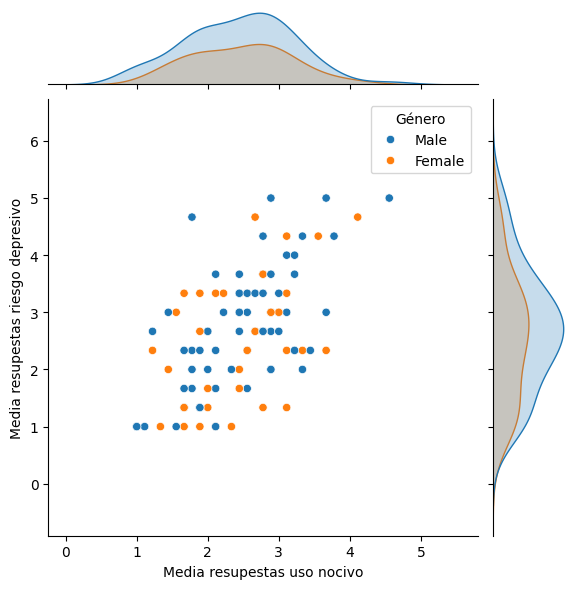

In [66]:
sns.jointplot(data = df_bajo_uso, x = df_bajo_uso["media_respuestas_uso"], y =df_bajo_uso["media_respuestas_riesgo"], hue = "Género")
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

<Figure size 800x800 with 0 Axes>

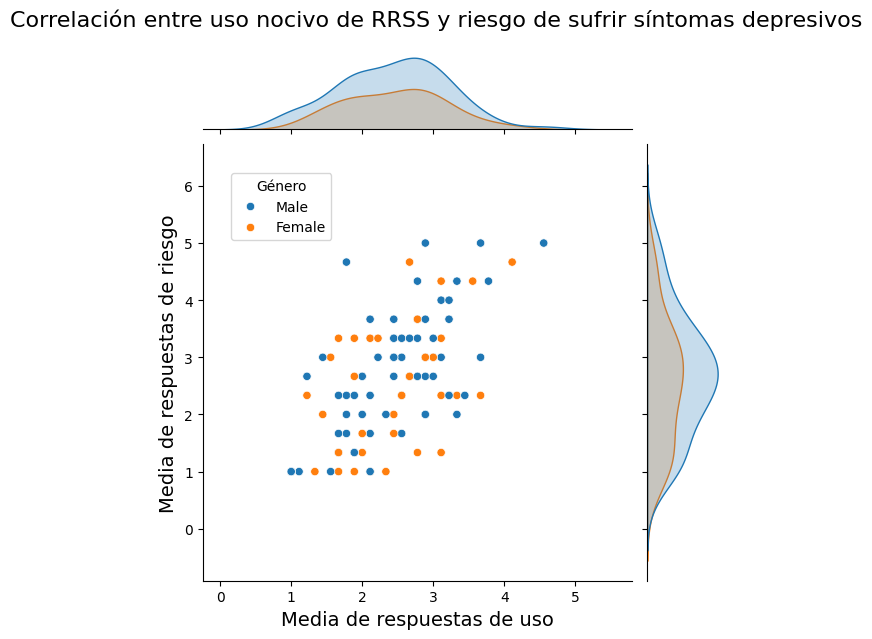

In [67]:
plt.figure(figsize=(8, 8))
joint_plot_1 = sns.jointplot(data=df_bajo_uso, x=df_bajo_uso["media_respuestas_uso"], y=df_bajo_uso["media_respuestas_riesgo"], hue="Género")
joint_plot_1.set_axis_labels("Media de respuestas de uso", "Media de respuestas de riesgo", fontsize=14)
joint_plot_1.fig.suptitle("Correlación entre uso nocivo de RRSS y riesgo de sufrir síntomas depresivos", y=1.05, fontsize=16)
joint_plot_1.ax_joint.legend(title="Género", loc='upper left', bbox_to_anchor=(0.05, 0.95));

plt.show();

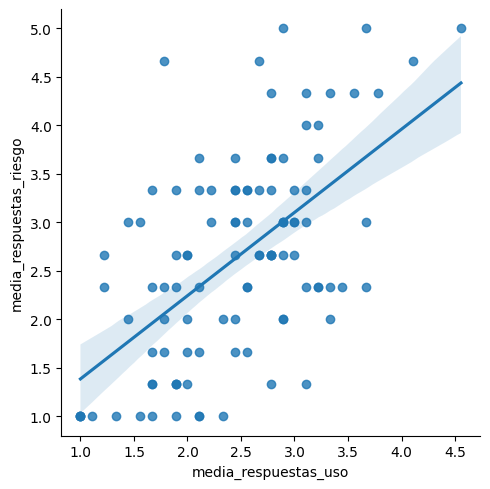

In [68]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True )

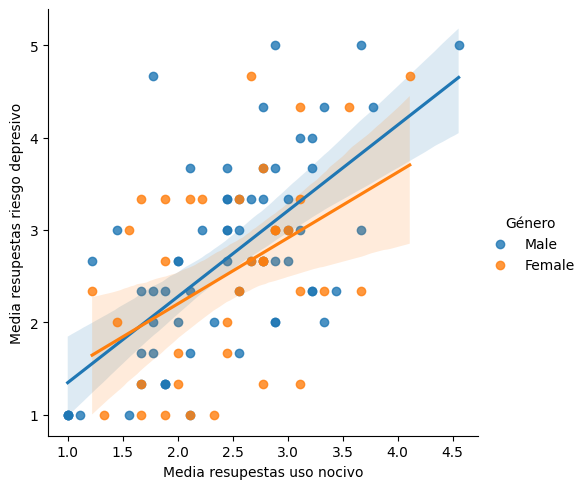

In [69]:
sns.lmplot( data = df_bajo_uso, x = "media_respuestas_uso", y = "media_respuestas_riesgo", fit_reg = True, hue = "Género" )
plt.xlabel("Media resupestas uso nocivo")
plt.ylabel("Media resupestas riesgo depresivo");

#### Finalmente decido hacer una columna adicional segun los tres rangos de uso que he definido previamente :Alto medio y bajo

In [ ]:
condiciones = [
    (df_1_esp["RS_tiempo_medio"] == 'Between 4 and 5 hours') | (df_1_esp["RS_tiempo_medio"] == 'More than 5 hours'),
    (df_1_esp["RS_tiempo_medio"] == 'Between 2 and 3 hours') | (df_1_esp["RS_tiempo_medio"] == 'Between 3 and 4 hours'),
    (df_1_esp["RS_tiempo_medio"] == 'Less than an Hour') | (df_1_esp["RS_tiempo_medio"] =='Between 1 and 2 hours')
]

opciones = ["Alto", "Medio", "Bajo"]

df_1_esp["Tipo_uso"] = np.select(condiciones, opciones, default="Desconocido")

print(df_1_esp[['RS_tiempo_medio', 'Tipo_uso']].tail(15))
print((df_1_esp['Tipo_uso'] == "Desconocido").value_counts())

           RS_tiempo_medio Tipo_uso
466  Between 4 and 5 hours     Alto
467  Between 1 and 2 hours     Bajo
468      More than 5 hours     Alto
469  Between 4 and 5 hours     Alto
470  Between 1 and 2 hours     Bajo
471      More than 5 hours     Alto
472  Between 1 and 2 hours     Bajo
473  Between 2 and 3 hours    Medio
474  Between 4 and 5 hours     Alto
475  Between 3 and 4 hours    Medio
476  Between 2 and 3 hours    Medio
477  Between 1 and 2 hours     Bajo
478  Between 2 and 3 hours    Medio
479  Between 2 and 3 hours    Medio
480      Less than an Hour     Bajo
Tipo_uso
False    481
Name: count, dtype: int64


### Usos de RRSS por género


La muestra presenta un desbalance notable entre los géneros, con una mayor proporción de mujeres (más del 50%) en comparación con hombres. Este desbalance puede afectar la interpretación de los resultados, ya que los grupos de género no están igualmente representados. Además, el grupo "Other" tiene una representación mínima (menos del 1%), lo que hace que no sea suficientemente representativo ni estadísticamente significativo para los análisis. Por lo tanto, se ha decidido excluir el grupo "Other" para evitar distorsiones en los resultados del análisis final y centrarse únicamente en los géneros con una muestra más equilibrada. Igualmente los resultados con esta muestra no nos van a arrojar conclusiones concluyentes en base al género.

C:\Users\teres\AppData\Local\Temp\ipykernel_28636\1782645820.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




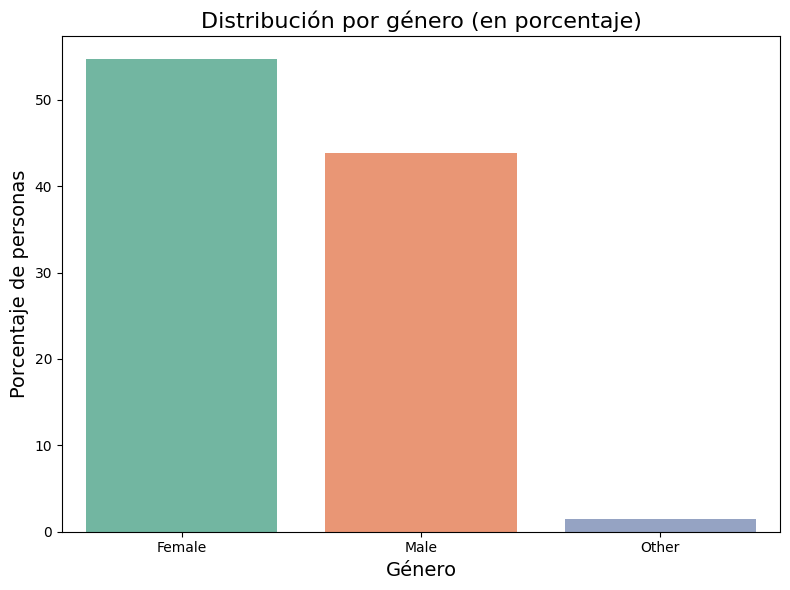

Género
Female    263
Male      211
Other       7
Name: count, dtype: int64


In [242]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df_1_esp["Género"].value_counts(normalize=True).index, 
            y=df_1_esp["Género"].value_counts(normalize=True).values * 100, 
            palette="Set2")
plt.title("Distribución por género (en porcentaje)", fontsize=16)
plt.xlabel("Género", fontsize=14)
plt.ylabel("Porcentaje de personas", fontsize=14)
plt.tight_layout()
plt.show()
print(df_1_esp["Género"].value_counts())

In [ ]:
n_mujeres = len(df_1_esp[df_1_esp["Género"] == "Female"])
n_hombres = len(df_1_esp[df_1_esp["Género"] == "Male"])
n_other = len(df_1_esp[df_1_esp["Género"] == "Other"])

# Calcular el porcentaje de mujeres, hombres y otros en el grupo "Alto" uso de redes sociales
muj_alto_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Female") & (df_1_esp["Tipo_uso"] == "Alto")]) / n_mujeres
print(f"Porcentaje de mujeres en uso alto de RRSS: {muj_alto_uso_porcentaje:.2%}")

hom_alto_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Male") & (df_1_esp["Tipo_uso"] == "Alto")]) / n_hombres
print(f"Porcentaje de hombres en uso alto de RRSS: {hom_alto_uso_porcentaje:.2%}")

other_alto_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Other") & (df_1_esp["Tipo_uso"] == "Alto")]) / n_other
print(f"Porcentaje de otros géneros en uso alto de RRSS: {other_alto_uso_porcentaje:.2%}")

Porcentaje de mujeres en uso alto de RRSS: 42.21%
Porcentaje de hombres en uso alto de RRSS: 31.75%
Porcentaje de otros géneros en uso alto de RRSS: 71.43%


In [ ]:
# Calcular el porcentaje de mujeres, hombres y otros en el grupo "Medio" uso de redes sociales
muj_medio_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Female") & (df_1_esp["Tipo_uso"] == "Medio")]) / n_mujeres
print(f"Porcentaje de mujeres en medio uso de RRSS: {muj_alto_uso_porcentaje:.2%}")

hom_medio_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Male") & (df_1_esp["Tipo_uso"] == "Medio")]) / n_hombres
print(f"Porcentaje de hombres en medio uso de RRSS: {hom_alto_uso_porcentaje:.2%}")

other_medio_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Other") & (df_1_esp["Tipo_uso"] == "Medio")]) / n_other
print(f"Porcentaje de otros géneros en medio uso de RRSS: {other_alto_uso_porcentaje:.2%}")

Porcentaje de mujeres en medio uso de RRSS: 42.21%
Porcentaje de hombres en medio uso de RRSS: 31.75%
Porcentaje de otros géneros en medio uso de RRSS: 71.43%


In [ ]:
# Calcular el porcentaje de mujeres, hombres y otros en el grupo "Bajo" uso de redes sociales
muj_bajo_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Female") & (df_1_esp["Tipo_uso"] == "Bajo")]) / n_mujeres
print(f"Porcentaje de mujeres en bajo uso de RRSS: {muj_alto_uso_porcentaje:.2%}")

hom_bajo_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Male") & (df_1_esp["Tipo_uso"] == "Bajo")]) / n_hombres
print(f"Porcentaje de hombres en bajo uso de RRSS: {hom_alto_uso_porcentaje:.2%}")

other_bajo_uso_porcentaje = len(df_1_esp[(df_1_esp["Género"] == "Other") & (df_1_esp["Tipo_uso"] == "Bajo")]) / n_other
print(f"Porcentaje de otros géneros en bajo uso de RRSS: {other_alto_uso_porcentaje:.2%}")

Porcentaje de mujeres en bajo uso de RRSS: 42.21%
Porcentaje de hombres en bajo uso de RRSS: 31.75%
Porcentaje de otros géneros en bajo uso de RRSS: 71.43%


In [239]:
# Calcular los porcentajes directamente usando groupby y value_counts
porcentajes_uso_genero = (df_1_esp.groupby(['Género', 'Tipo_uso']).size().unstack(fill_value=0))

# Normalizar por género (dividiendo entre el total de cada género)
porcentajes_uso_genero = porcentajes_uso_genero.div(porcentajes_uso_genero.sum(axis=1), axis=0) * 100

print(porcentajes_uso_genero)

Tipo_uso       Alto       Bajo      Medio
Género                                   
Female    42.205323  14.068441  43.726236
Male      31.753555  31.753555  36.492891
Other     71.428571   0.000000  28.571429


In [240]:
# Calcular el mínimo de las respuestas sumadas por usuario, filtrando por "Alto" uso de redes sociales
min_value = df_1_esp[df_1_esp["Tipo_uso"] == "Alto"][["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1).min() / 9

print(f"Valor mínimo de uso nocivo de RRSS en el grupo 'Alto' (promedio por pregunta): {min_value:.2f}")

Valor mínimo de uso nocivo de RRSS en el grupo 'Alto' (promedio por pregunta): 1.22


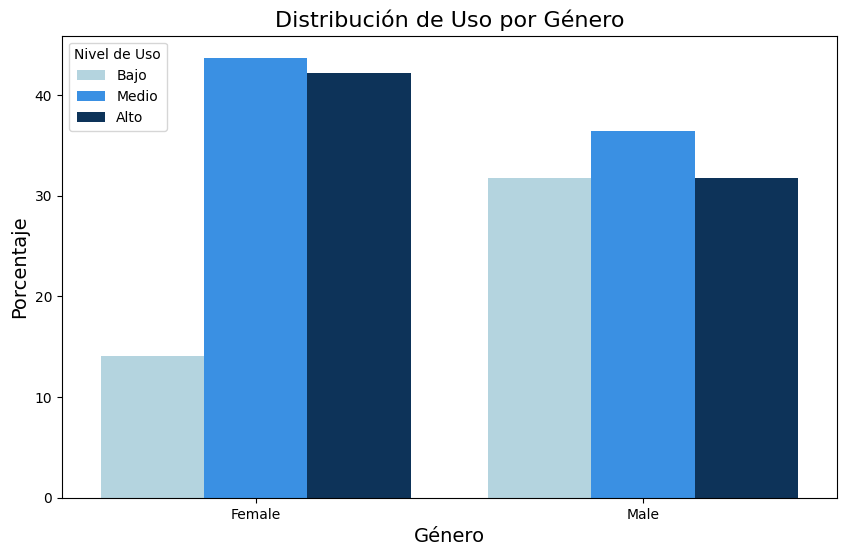

In [235]:
palette = {"Alto": "#003366",  
           "Medio": "#1E90FF", 
           "Bajo": "#ADD8E6"}  

porcentajes_uso_genero_melted_filtered = porcentajes_uso_genero_melted[porcentajes_uso_genero_melted["Género"] != "Other"]

porcentajes_uso_genero_melted_filtered = porcentajes_uso_genero_melted_filtered.sort_values("Porcentaje", ascending=True)

porcentajes_uso_genero_melted_filtered['Nivel de Uso'] = pd.Categorical(porcentajes_uso_genero_melted_filtered['Nivel de Uso'], categories=["Bajo", "Medio", "Alto"], ordered=True)

plt.figure(figsize=(10, 6))

sns.barplot(data=porcentajes_uso_genero_melted_filtered, x="Género", y="Porcentaje", hue="Nivel de Uso", palette=palette, hue_order=["Bajo", "Medio", "Alto"])
plt.title("Distribución de Uso por Género", fontsize=16)
plt.ylabel("Porcentaje", fontsize=14)
plt.xlabel("Género", fontsize=14)
plt.legend(title="Nivel de Uso", loc="upper left")
plt.show()

#### Análisis para ver si hay diferencias por grupos de edad

Creo una nueva columna de grupos de edad en la que voy a desglosar más los grupos de los jóvenes porque la muestra se concentra sobre todo entre un rango de edades entre 20 y 30 años, y por si hubiera alguna variación

In [201]:


df_1_esp["Grupos_edad"] = np.nan

df_1_esp.loc[df_1_esp["Edad"]<= 18, "Grupos_edad"] = "menores 18 años"

df_1_esp.loc[(df_1_esp["Edad"]> 18) & (df_1_esp["Edad"]<= 25), "Grupos_edad"] = "Jóvenes de 19-25"

df_1_esp.loc[(df_1_esp["Edad"]> 25) & (df_1_esp["Edad"]<= 35), "Grupos_edad"] = "Jóvenes de 26-35"

df_1_esp.loc[(df_1_esp["Edad"]> 35) & (df_1_esp["Edad"]<= 50), "Grupos_edad"] = "Adultos de 36-50"

df_1_esp.loc[(df_1_esp["Edad"]> 50), "Grupos_edad"] = "Adultos > 50"





C:\Users\teres\AppData\Local\Temp\ipykernel_28636\339379072.py:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'menores 18 años' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [202]:
df_1_esp["Grupos_edad"].unique()

array(['Jóvenes de 19-25', 'Jóvenes de 26-35', 'menores 18 años',
       'Adultos > 50', 'Adultos de 36-50'], dtype=object)

Sobre el df original

##### Voy a crear una columna nueva sobre el dataframe original de tiempos de uso como variable categórica, porque me va a ser más fácil operar con toda la tabla, es lo que tenia que haber hecho al principio
##### Añado las columnas de media de resupuestas uso y media de respuestas de riesgo

In [203]:
df_1_esp["Tiempo_uso_num"]=0

In [204]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Less than an Hour") | (df_1_esp["RS_tiempo_medio"]== "Between 1 and 2 hours"),"Tiempo_uso_num"] = "0-2h"

C:\Users\teres\AppData\Local\Temp\ipykernel_28636\3513507500.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0-2h' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



In [205]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 2 and 3 hours") | (df_1_esp["RS_tiempo_medio"]== "Between 3 and 4 hours"),"Tiempo_uso_num"] = "2-4h"

In [206]:
df_1_esp.loc[(df_1_esp["RS_tiempo_medio"]== "Between 4 and 5 hours") | (df_1_esp["RS_tiempo_medio"]== "More than 5 hours"),"Tiempo_uso_num"] = "4+h"

In [207]:
df_1_esp["media_respuestas_uso"] = df_1_esp[["TDAH_1","TDAH_2","TDAH_3","TDAH_4","Ansiedad_1","Ansiedad_2","Autoestima_1","Autoestima_2","Autoestima_3"]].sum(axis=1)/9

In [208]:
df_1_esp["media_respuestas_riesgo"] = df_1_esp[["Depresion_1","Depresion_2","Depresion_3"]].sum(axis=1)/3

##### Máscaras para definir lo que es una actitud nociva baja, media o alta para poder sacar los gráficos  que relacionan la intensidad de uso de RRSS con el uso nocivo de estas y con el mayor riesgo a tener síntomas depresivos.

En este análisis, agrupo las respuestas sobre la actitud hacia el uso de redes sociales en tres categorías: baja, media y alta, en función de la media de las respuestas a las preguntas relacionadas con el uso nocivo de las redes sociales. Los rangos definidos para cada categoría se basan en la distribución de los valores de la media, dividiendo las respuestas en tres intervalos que representan una gradación en la intensidad de la actitud.

* **Baja (1 - 2.33)**: Este rango representa una actitud de bajo uso nocivo, donde las respuestas sugieren que el usuario tiene un uso más controlado y menos problemático de las redes sociales. Las respuestas en este rango indican una menor afectación emocional o conductual por el uso de redes sociales.

* **Media (2.34 - 3.67)**: En este rango se encuentra una actitud intermedia, en la cual el uso de redes sociales empieza a generar un impacto más notable en la persona. Las respuestas sugieren que el usuario podría experimentar ciertos efectos negativos, como distracción o incomodidad, pero sin llegar a ser problemático de manera crítica.

* **Alta (3.68 - 5)**: Este rango refleja una actitud de alto uso nocivo, en la cual las respuestas indican que el uso de redes sociales está teniendo un impacto negativo significativo en el comportamiento o bienestar emocional del usuario. Las respuestas en este rango pueden estar relacionadas con una mayor ansiedad, distracción o un deseo de validación a través de las redes sociales.

In [209]:
mascara_actitud_ansiosa_baja_1= df_1_esp[df_1_esp["media_respuestas_uso"]<=2.33]

mascara_actitud_ansiosa_media_1 = df_1_esp[(df_1_esp["media_respuestas_uso"] > 2.33) & (df_1_esp["media_respuestas_uso"] <= 3.67)]

mascara_actitud_ansiosa_alta_1 = df_1_esp[df_1_esp["media_respuestas_uso"] > 3.67]

In [160]:
df_1_esp.head()

,Edad,Género,Estatus relacional,Ocupación,RS_uso,RS_tipo,RS_tiempo_medio,TDAH_1,TDAH_2,TDAH_3,...,Autoestima_2,Autoestima_3,Depresion_1,Depresion_2,Depresion_3,Tipo_uso,Grupos_edad,Tiempo_uso_num,media_respuestas_uso,media_respuestas_riesgo
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,...,3,2,5,4,5,Medio,Jóvenes de 19-25,2-4h,3.222222,4.666667
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,...,1,1,5,4,5,Alto,Jóvenes de 19-25,4+h,3.222222,4.666667
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,...,3,1,4,2,5,Medio,Jóvenes de 19-25,2-4h,2.666667,3.666667
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,...,1,2,4,3,2,Alto,Jóvenes de 19-25,4+h,2.888889,3.000000
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,...,3,3,4,4,1,Medio,Jóvenes de 19-25,2-4h,3.888889,3.000000


In [243]:

colores = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}

df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Uso nocivo bajo'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Uso nocivo medio'),
                mascara_actitud_ansiosa_alta_1.assign(actitud='Uso nocivo alto')])

df_count = df.groupby(['Tiempo_uso_num', 'actitud']).size().unstack().reset_index()

df_count = df_count[['Tiempo_uso_num', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo']]

fig = go.Figure()

for col in df_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_count['Tiempo_uso_num'], y=df_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title = 'Actitudes potencialmente nocivas en función del tiempo en las RRSS',
                  title_x = 0.5,
                  title_font = dict(size=24),
                  xaxis_title = 'Tiempo de uso',
                  yaxis_title = 'Número de personas',
                  font = dict(size=18))

fig.show()

In [245]:
df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Uso nocivo bajo'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Uso nocivo medio'),
                mascara_actitud_ansiosa_alta_1.assign(actitud='Uso nocivo alto')])

df_count = df.groupby(['Tiempo_uso_num', 'actitud']).size().reset_index(name='Número de personas')

df_count['Porcentaje'] = df_count.groupby('Tiempo_uso_num')['Número de personas'].transform(lambda x: x / x.sum() * 100)

colores = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}

fig = px.bar(df_count, 
             x='Tiempo_uso_num', 
             y='Porcentaje', 
             color='actitud', 
             color_discrete_map=colores,
             barmode='stack',  
             title = 'Actitudes potencialmente nocivas (%) en función del tiempo en las RRSS',
             labels = {"Tiempo_uso_num": "Tiempo de uso (horas)", "Porcentaje": "Porcentaje de personas"})

fig.update_layout(
    title_x=0.5, 
    title_font=dict(size=24),
    xaxis_title="Tiempo de uso",
    yaxis_title="Porcentaje de personas",
    font=dict(size=18))
fig.show()


In [213]:
mascara_riesgo_baja_1= df_1_esp[df_1_esp["media_respuestas_riesgo"]<=2.33]

mascara_riesgo_media_1 = df_1_esp[(df_1_esp["media_respuestas_riesgo"] > 2.33) & (df_1_esp["media_respuestas_riesgo"] <= 3.67)]

mascara_riesgo_alta_1 = df_1_esp[df_1_esp["media_respuestas_riesgo"] > 3.67]

In [248]:

df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

df_riesgo_count = df_riesgo.groupby(['Tiempo_uso_num', 'riesgo']).size().unstack().reset_index()

df_riesgo_count = df_riesgo_count[['Tiempo_uso_num', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

fig = go.Figure()

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_riesgo_count['Tiempo_uso_num'], y=df_riesgo_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title = 'Número de personas en riesgo de depresión según el tiempo en RRSS',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Tiempo de uso',
                  yaxis_title='Número de personas',
                  font=dict(size=18))

fig.show()

In [221]:
df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

df_riesgo_count = df_riesgo.groupby(['Tiempo_uso_num', 'riesgo']).size().unstack().reset_index()

df_riesgo_count = df_riesgo_count[['Tiempo_uso_num', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

df_riesgo_percent = df_riesgo_count.set_index('Tiempo_uso_num').apply(lambda x: x / x.sum() * 100, axis=1)

fig = go.Figure()

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_percent.columns:
    fig.add_trace(go.Bar(x=df_riesgo_percent.index, y=df_riesgo_percent[col], name=col, marker_color=colores[col]))

fig.update_layout(
    title ='Porcentaje de riesgo depresivo por cantidad de horas en RRSS',
    title_x = 0.5,
    title_font = dict(size=24),
    xaxis_title = 'Tiempo de uso (horas)',
    yaxis_title = 'Porcentaje de personas',
    font=dict(size = 18),
    barmode='stack')
fig.show()

 ##### **Diferencias por género:**
En este análisis, se explora la relación entre el género y el uso de redes sociales. Ya hemos observado previamente cómo las variables de "media de respuestas de uso nocivo" y "media de respuestas de riesgo" se correlacionan dentro de cada grupo, según la intensidad de uso de redes sociales. Sin embargo, al analizar las diferencias por género, no encontramos diferencias significativas en los resultados. Es importante **destacar que la muestra estaba desbalanceada**, ya que había más mujeres que hombres. Este desequilibrio podría haber influido en la capacidad de detectar diferencias por género, ya que un número más equilibrado entre los géneros podría haber ofrecido una comparación más representativa

In [250]:

colores4 = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}

df = pd.concat([mascara_actitud_ansiosa_baja_1.assign(actitud='Uso nocivo bajo'),
                mascara_actitud_ansiosa_media_1.assign(actitud='Uso nocivo medio'),
                mascara_actitud_ansiosa_alta_1.assign(actitud= 'Uso nocivo alto')])
df_filtered = df[df['Género'] != 'Other']

df_count = df_filtered.groupby(['Género', 'actitud']).size().unstack().reset_index()

df_count = df_count[['Género', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo']]

fig = go.Figure()

for col in df_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_count['Género'], y=df_count[col], name=col, marker_color=colores4[col]))

fig.update_layout(title='Actitud potencialmente nociva en el uso de RRSS por género ',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Género',
                  yaxis_title='Número de personas',
                  font=dict(size=18))
                    

fig.update_xaxes(tickfont=dict(size=16))
                  

fig.show()

In [ ]:

# Excluimos "Other" del grupo 'Género'
df_filtered = df[df['Género'] != 'Other']

df_count = df_filtered.groupby(['Género', 'actitud']).size().unstack().reset_index()

df_count = df_count[['Género', 'Uso nocivo alto', 'Uso nocivo medio', 'Uso nocivo bajo']]

df_percent = df_count.set_index('Género').apply(lambda x: x / x.sum() * 100, axis=1)

colores4 = {'Uso nocivo bajo': 'green', 'Uso nocivo medio': 'orange', 'Uso nocivo alto': 'red'}


fig = go.Figure()

for col in df_percent.columns:
    fig.add_trace(go.Bar(x=df_percent.index, y=df_percent[col], name=col, marker_color=colores4[col]))

fig.update_layout(
    title='Actitud potencialmente nociva en el uso de RRSS por género',
    title_x=0.5,
    title_font=dict(size=24),
    xaxis_title='Género',
    yaxis_title='Porcentaje de personas',
    font=dict(size=18),
    barmode='stack')

fig.update_xaxes(tickfont=dict(size=16))

fig.show()

In [252]:
df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])
df_riesgo_filtered = df_riesgo[df_riesgo['Género'] != 'Other']

df_riesgo_count = df_riesgo_filtered.groupby(['Género', 'riesgo']).size().unstack().reset_index()

df_riesgo_count = df_riesgo_count[['Género', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

fig = go.Figure()

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

for col in df_riesgo_count.columns[1:]:
    fig.add_trace(go.Bar(x=df_riesgo_count['Género'], y=df_riesgo_count[col], name=col, marker_color=colores[col]))

fig.update_layout(title='Personas con riesgo de experimentar algún síntoma depresivo por género',
                  title_x=0.5,
                  title_font=dict(size=24),
                  xaxis_title='Género',
                  yaxis_title='Número de personas',
                  font=dict(size=18))

fig.show()

In [228]:

df_riesgo = pd.concat([mascara_riesgo_baja_1.assign(riesgo='Riesgo bajo'),
                       mascara_riesgo_media_1.assign(riesgo='Riesgo medio'),
                       mascara_riesgo_alta_1.assign(riesgo='Riesgo alto')])

df_filtered = df_riesgo[df_riesgo['Género'] != 'Other']

df_riesgo_count = df_filtered.groupby(['Género', 'riesgo']).size().unstack().reset_index()

print(df_riesgo_count.columns)

df_riesgo_count = df_riesgo_count[['Género', 'Riesgo alto', 'Riesgo medio', 'Riesgo bajo']]

df_riesgo_percent = df_riesgo_count.set_index('Género').apply(lambda x: x / x.sum() * 100, axis=1)

colores = {'Riesgo bajo': 'green', 'Riesgo medio': 'orange', 'Riesgo alto': 'red'}

fig = go.Figure()

for col in df_riesgo_percent.columns:
    fig.add_trace(go.Bar(x=df_riesgo_percent.index, y=df_riesgo_percent[col], name=col, marker_color=colores[col]))

fig.update_layout(
    title='Porcentaje de riesgo depresivo por género',
    title_x=0.5,
    title_font=dict(size=24),
    xaxis_title='Género',
    yaxis_title='Porcentaje de personas',
    font=dict(size=18),
    barmode='stack')

fig.update_xaxes(tickfont=dict(size=16))

fig.show()

Index(['Género', 'Riesgo alto', 'Riesgo bajo', 'Riesgo medio'], dtype='object', name='riesgo')


#### **Diferencias por grupos de edad:**
Creo gráficos para explorar las diferencias en el uso de redes sociales por grupos de edad. Sin embargo, es importante señalar que la muestra no es completamente representativa de todas las edades. Esto limita la capacidad de generalizar los resultados, ya que **no contamos con un equilibrio adecuado en los grupos de edad**. Aunque los gráficos pueden dar una idea del patrón en los datos disponibles, no se pueden extraer conclusiones definitivas ni generalizarlas a la población en general debido a la falta de representación equilibrada

In [186]:
orden_grupos_edad = [
    'menores 18 años',
    'Jóvenes de 19-25',
    'Jóvenes de 26-35',
    'Adultos de 36-50',
    'Adultos > 50']

<Figure size 1000x600 with 0 Axes>

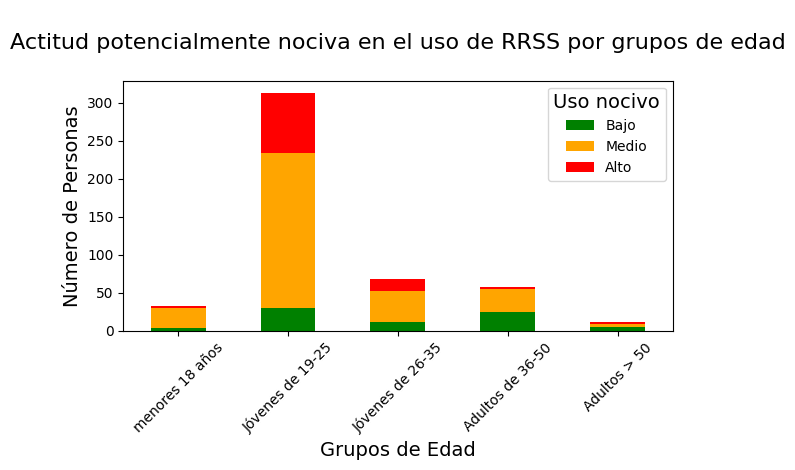

In [224]:
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

plt.figure(figsize=(10, 6))

df_counts.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

plt.title("\nActitud potencialmente nociva en el uso de RRSS por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Uso nocivo", title_fontsize="14")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

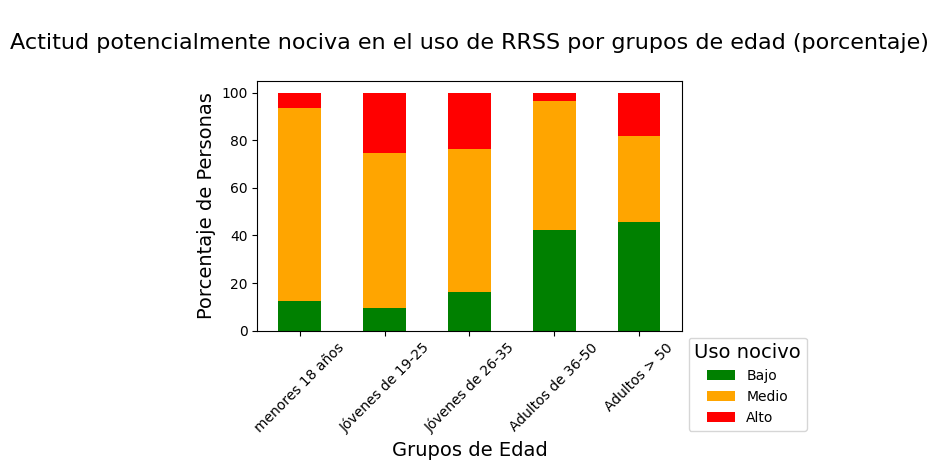

In [ ]:
baja_counts = mascara_actitud_ansiosa_baja_1["Grupos_edad"].value_counts().sort_index()
media_counts = mascara_actitud_ansiosa_media_1["Grupos_edad"].value_counts().sort_index()
alta_counts = mascara_actitud_ansiosa_alta_1["Grupos_edad"].value_counts().sort_index()
df_counts_absolute = pd.DataFrame({"Bajo": baja_counts, "Medio": media_counts, "Alto": alta_counts})


df_counts_absolute = df_counts_absolute.reindex(orden_grupos_edad)


df_counts_percent = df_counts_absolute.div(df_counts_absolute.sum(axis=1), axis=0) * 100

colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

plt.figure(figsize=(10, 6))

df_counts_percent.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

plt.title("\nActitud potencialmente nociva en el uso de RRSS por grupos de edad (porcentaje)\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14) 
plt.ylabel("Porcentaje de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Uso nocivo", title_fontsize="14", loc='upper left', bbox_to_anchor=(1, 0))
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

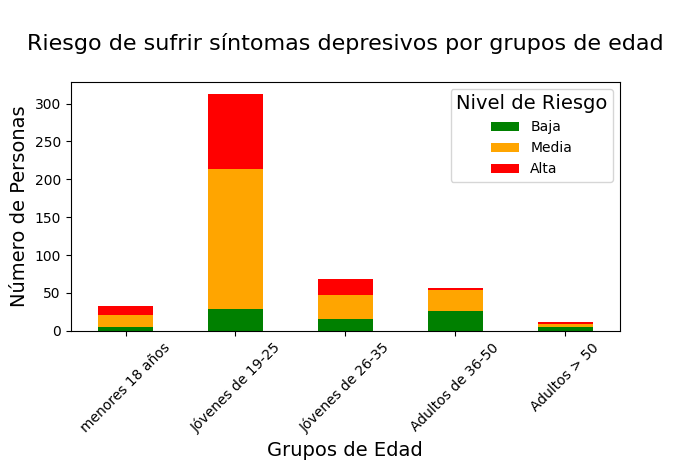

In [230]:
# Definir los colores para cada nivel de riesgo
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

plt.figure(figsize=(10, 6))

df_counts.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

plt.title("\nRiesgo de sufrir síntomas depresivos por grupos de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Número de Personas", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Nivel de Riesgo", title_fontsize="14")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

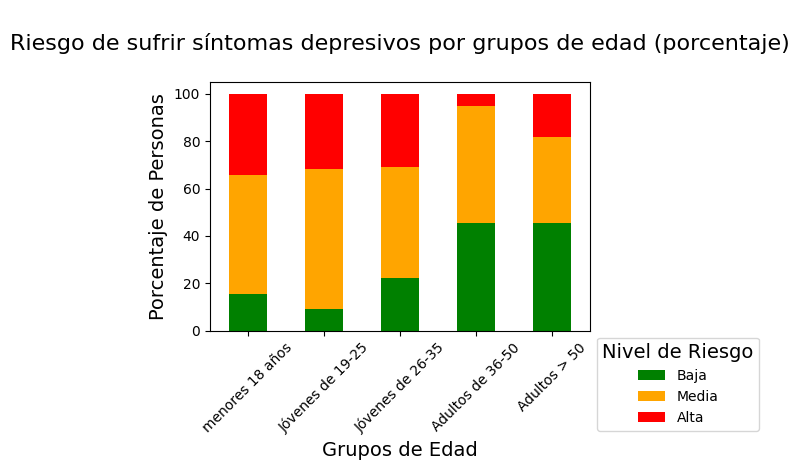

In [231]:
colores = {'Bajo': 'green', 'Medio': 'orange', 'Alto': 'red'}

# Reemplaza df_counts por df_counts_percent, que contiene los porcentajes
df_counts_percent = df_counts.div(df_counts.sum(axis=1), axis=0) * 100  # Normaliza y convierte en porcentaje

# Crear la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras apiladas con porcentajes
df_counts_percent.plot(kind="bar", stacked=True, color=[colores["Bajo"], colores["Medio"], colores["Alto"]])

# Establecer el título y etiquetas de los ejes
plt.title("\nRiesgo de sufrir síntomas depresivos por grupos de edad (porcentaje)\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14)
plt.ylabel("Porcentaje de Personas", fontsize=14)
plt.xticks(rotation=45)

# Mostrar la leyenda fuera del gráfico (abajo a la derecha)
plt.legend(title="Nivel de Riesgo", title_fontsize="14", loc='upper left', bbox_to_anchor=(1, 0))

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### **ANEXO Algunos gráficos descriptivos extra que puede que incluya en la presentación de las características demográficas de la muestra**

In [233]:
df_1_esp["Ocupación"].unique()

array(['University Student', 'School Student', 'Salaried Worker',
       'Retired'], dtype=object)

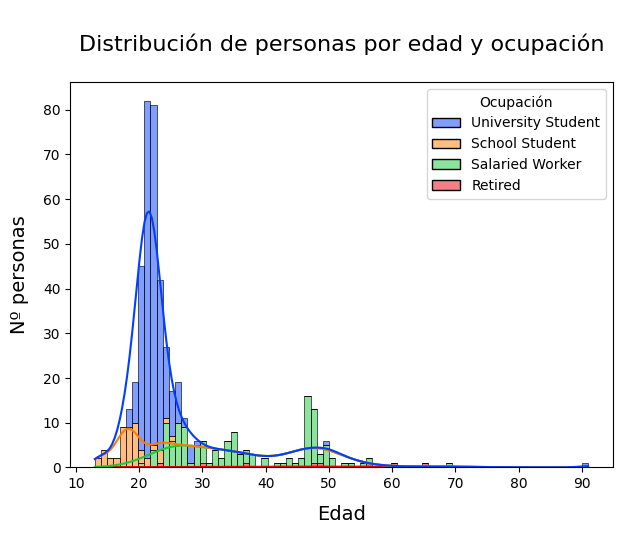

In [102]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_1_esp, x="Edad", bins=80, hue="Ocupación", multiple="stack", palette="bright", kde=True)
plt.xlabel("Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº personas", fontsize=14,labelpad=(10.0))
plt.title("\nDistribución de personas por edad y ocupación\n", fontsize=16)
plt.show()

C:\Users\teres\AppData\Local\Temp\ipykernel_20048\3743932786.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\teres\AppData\Local\Temp\ipykernel_20048\3743932786.py:9: UserWarning:

The palette list has more values (10) than needed (4), which may not be intended.



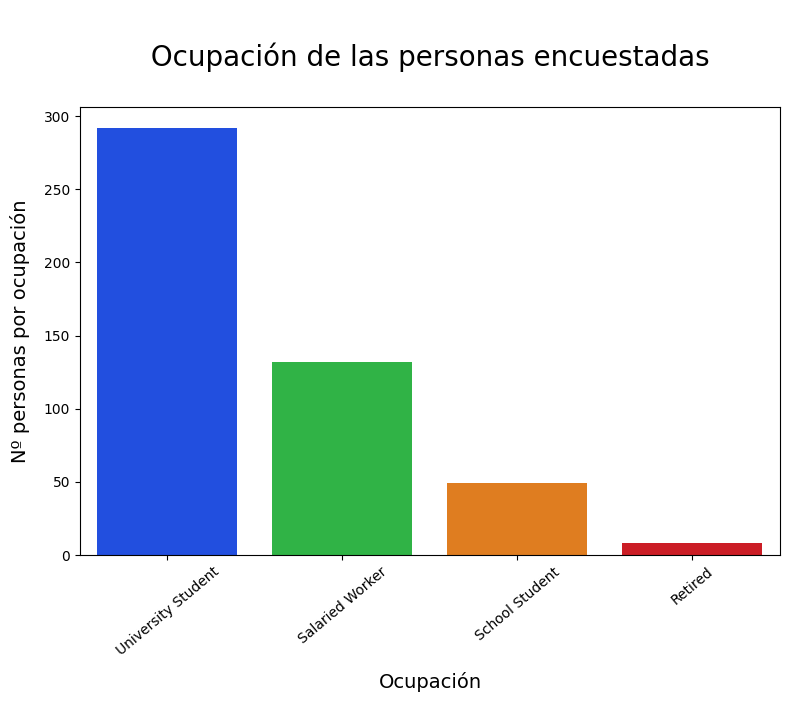

In [103]:
palette = sns.color_palette("bright")

idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")

palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

plt.figure(figsize=(8, 7))
sns.barplot(x=df_1_esp["Ocupación"].value_counts().index, 
            y=df_1_esp["Ocupación"].value_counts(),
            palette=palette)

plt.title("\n Ocupación de las personas encuestadas \n", fontsize=20, ha='center')
plt.ylabel("Nº personas por ocupación", labelpad=10, fontsize=14)
plt.xticks(rotation=40)
plt.xlabel("Ocupación", labelpad=10, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

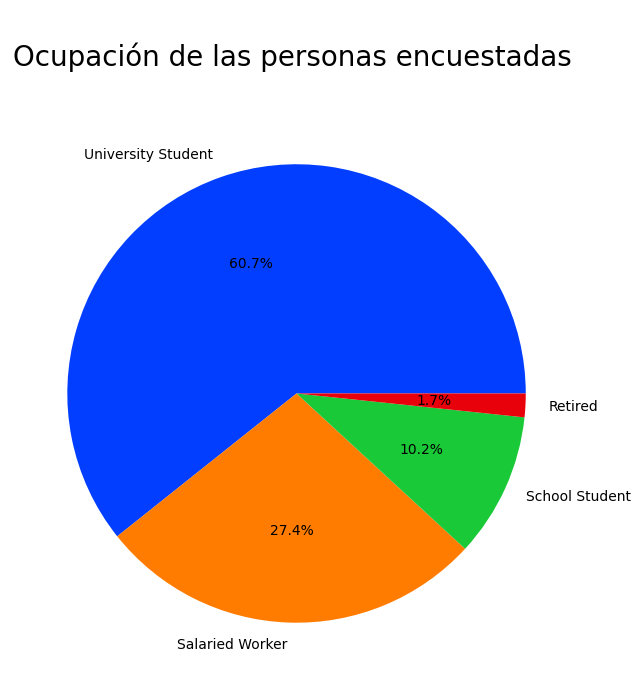

In [104]:
idx_salaried = df_1_esp["Ocupación"].value_counts().index.get_loc("Salaried Worker")
idx_student = df_1_esp["Ocupación"].value_counts().index.get_loc("School Student")


palette[idx_salaried], palette[idx_student] = palette[idx_student], palette[idx_salaried]

plt.figure(figsize=(8, 7))
plt.pie(df_1_esp["Ocupación"].value_counts(), labels=df_1_esp["Ocupación"].value_counts().index, autopct='%1.1f%%', colors=palette)

plt.title("\nOcupación de las personas encuestadas \n", fontsize=20, ha='center')
plt.tight_layout()
plt.show()

In [105]:
df_1_esp["Grupos_edad"].value_counts()

Grupos_edad
Jóvenes de 19-25    313
Jóvenes de 26-35     68
Adultos de 36-50     57
menores 18 años      32
Adultos > 50         11
Name: count, dtype: int64

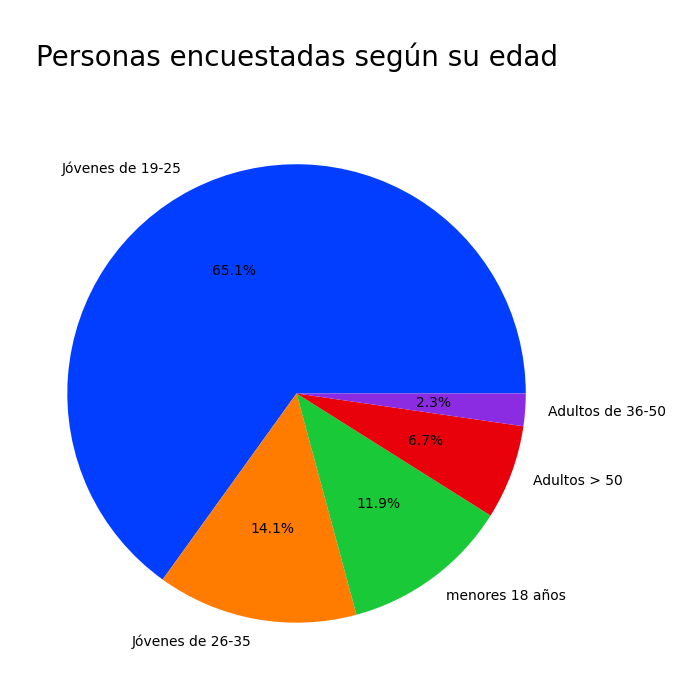

In [106]:
plt.figure(figsize=(8, 7))
plt.pie(df_1_esp["Grupos_edad"].value_counts(), labels=df_1_esp["Grupos_edad"].unique(), autopct='%1.1f%%', colors=palette)
plt.title("\nPersonas encuestadas según su edad\n", fontsize=20, ha='center')
plt.tight_layout()
plt.show()

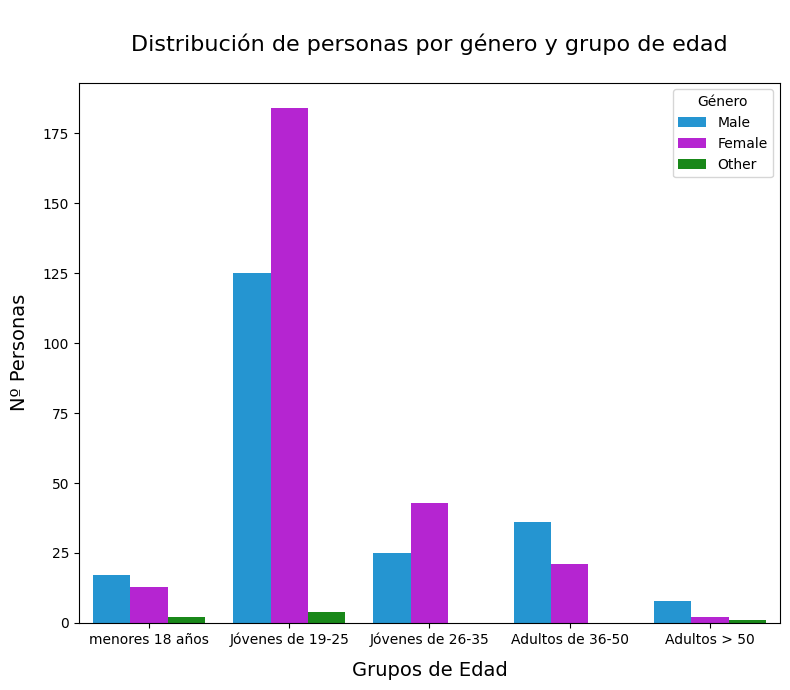

In [107]:

order = ["menores 18 años", "Jóvenes de 19-25", "Jóvenes de 26-35", "Adultos de 36-50", "Adultos > 50"]

df_1_esp["Grupos_edad"] = pd.Categorical(df_1_esp["Grupos_edad"], categories=order, ordered=True)


custom_palette = {"Other": "#069B06", "Female": "#C808EE", "Male": "#089EEE"}

plt.figure(figsize=(8,7))

sns.countplot(data=df_1_esp, x="Grupos_edad", hue="Género", palette=custom_palette)

plt.title("\nDistribución de personas por género y grupo de edad\n", fontsize=16)
plt.xlabel("Grupos de Edad", fontsize=14, labelpad=(10.0))
plt.ylabel("Nº Personas", fontsize=14, labelpad=(10.0))
plt.tight_layout()
plt.show()

#### Guardo el dataset con los datos procesados en la ruta de data/processed

In [194]:
df_1_esp.to_csv("C:\\Users\\teres\\Desktop\\Bootcamp\\Carpeta_alumno\\carpeta_profesor\\2402_dsft_thebridge\\Entregas\\EDA\\mental_health_kaggle\\EDA\\data\\processed\\df_1_esp.csv", sep=";", index=False, encoding='utf-8')